## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')

numeric_data = data.select_dtypes(include=np.number)
print("Основна статистична інформація по числовим змінним:")
print(numeric_data.describe())

print("\nРозмірність датасету:")
print("Кількість рядків:", data.shape[0])
print("Кількість стовпців:", data.shape[1])


Основна статистична інформація по числовим змінним:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
st

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [6]:
bank_target = pd.get_dummies(data['y'], drop_first=True)  
print(bank_target.head())


     yes
0  False
1  False
2  False
3  False
4  False


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [7]:
bank_client = data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
for column in bank_client.columns:
    unique_values = bank_client[column].unique()
    print(f"Унікальні значення для атрибуту '{column}': {unique_values}")


Унікальні значення для атрибуту 'age': [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Унікальні значення для атрибуту 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Унікальні значення для атрибуту 'marital': ['married' 'single' 'divorced' 'unknown']
Унікальні значення для атрибуту 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Унікальні значення для атрибуту 'default': ['no' 'unknown' 'yes']
Унікальні значення для атрибуту 'housing': ['no' 'yes' 'unknown']
Унікальні значення для атрибуту 'loan': ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Максимальний вік: 98
Мінімальний вік: 17
Кількість NaN у віці: 0


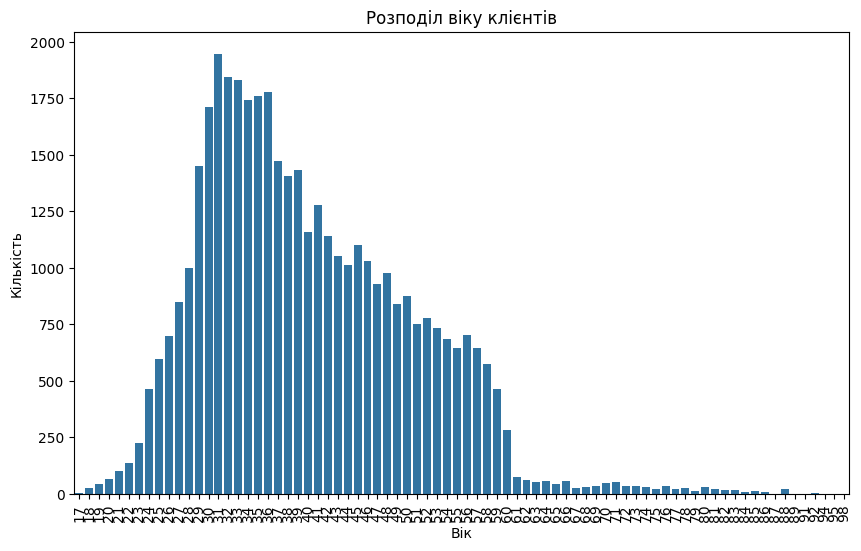

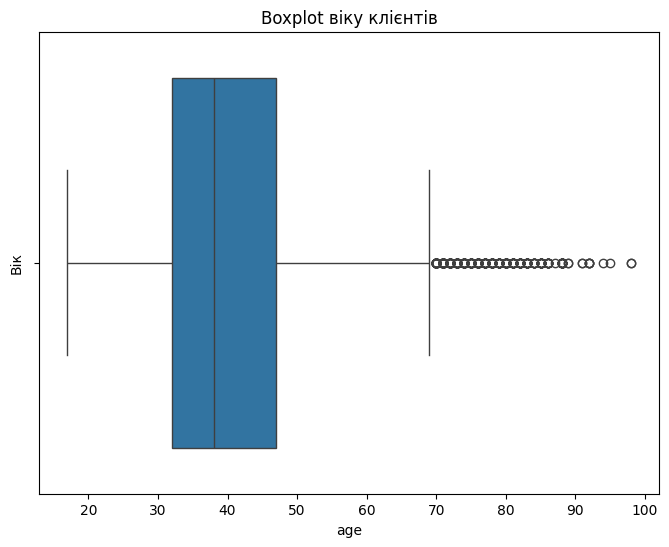

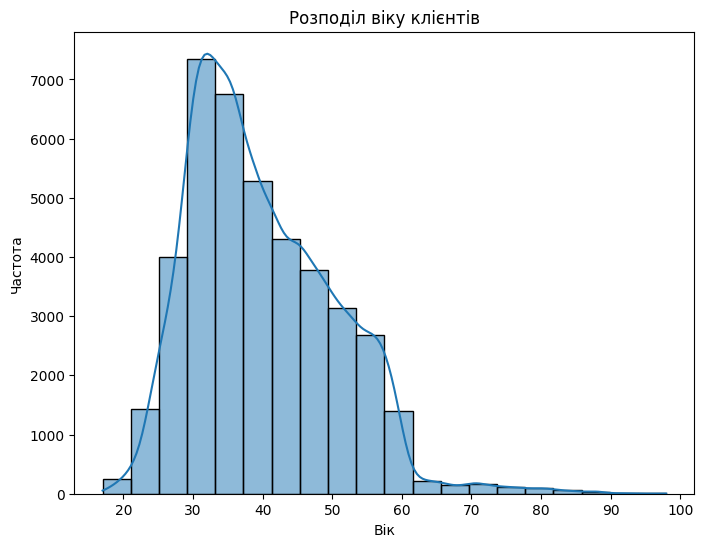

In [8]:
print("Максимальний вік:", bank_client['age'].max())
print("Мінімальний вік:", bank_client['age'].min())

print("Кількість NaN у віці:", bank_client['age'].isnull().sum())

plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=bank_client)
plt.title('Розподіл віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=bank_client, orient='v')
plt.title('Boxplot віку клієнтів')
plt.ylabel('Вік')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(bank_client['age'], kde=True, bins=20)
plt.title('Розподіл віку клієнтів')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Максимальне та мінімальне значення віку:
Максимальний вік клієнта - 98 років.
Мінімальний вік клієнта - 17 років.
Це показники реальних даних про клієнтів банку, що вказують на широкий діапазон віку клієнтів.

2. Перевірка на наявність NaN:
Кількість NaN у віці: 0.
Немає відсутніх значень у віці, що дозволяє нам працювати з цим атрибутом без необхідності в заповненні пропущених даних.

3. Візуальний аналіз змінної Age:
countplot: показує розподіл кількості клієнтів за віком. Більше всього клієнтів знаходиться в діапазоні віку від 30 до 40 років.
boxplot: демонструє основні статистики віку, такі як медіана, квартилі, а також викиди.
distplot: відображає розподіл віку клієнтів. Розподіл досить симетричний, з деяким відхиленням вправо, що вказує на наявність більш старших клієнтів у вибірці.

4. Перевірка розподілу по змінній Age на важкі хвости:
розподіл не сильно відрізняється від нормального, що підтверджується гістограмою та діаграмою розмаху.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [9]:
import pandas as pd
import numpy as np

def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """
    sorted_data = np.sort(df[column])

    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    IQR = Q3 - Q1

    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers


In [10]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1. Розподіл віку: Більшість клієнтів (80% між 10 та 90 перцентилями) мають вік в діапазоні між 28 та 55 роками. Це свідчить про те, що більшість клієнтів в цій вибірці належать до середнього вікового діапазону.

2. Викиди віку: Два записи про клієнтів із віком 98 років вважаються викидами, оскільки вони суттєво виходять за верхню межу, встановлену за допомогою методу міжквартильного розмаху.

3. Характер викидів: Викиди в цій вибірці представлені лише в одному напрямку, тобто мають значення, що суттєво перевищують верхню межу викидів.

4. Інтерпретація: Поява викидів у віці 98 років може бути випадковою помилкою або результатом неправильного внесення даних. Оскільки такий великий вік є досить несподіваним для цільової аудиторії банку, додаткове дослідження може бути необхідним для визначення причини цих викидів.


**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

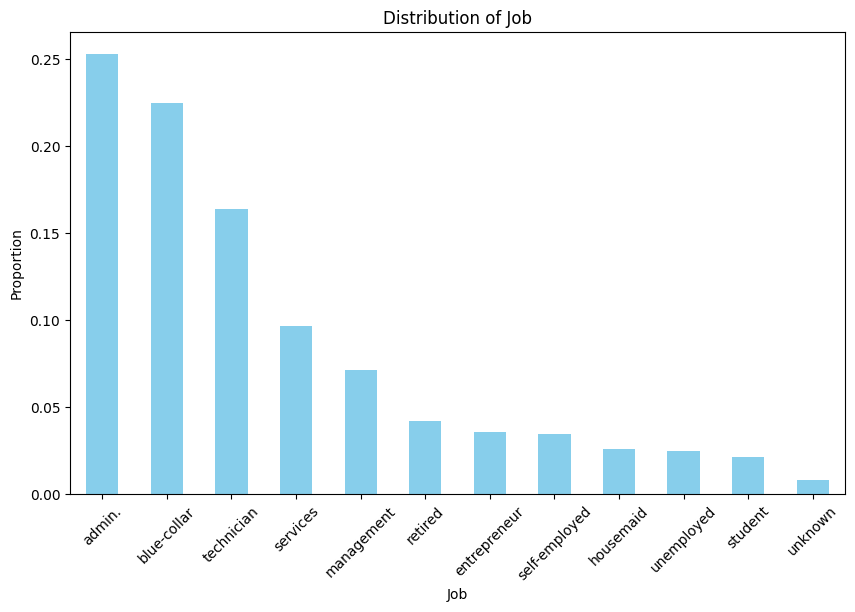

In [11]:
plt.figure(figsize=(10,6))
data['job'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Distribution of Job')
plt.xlabel('Job')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

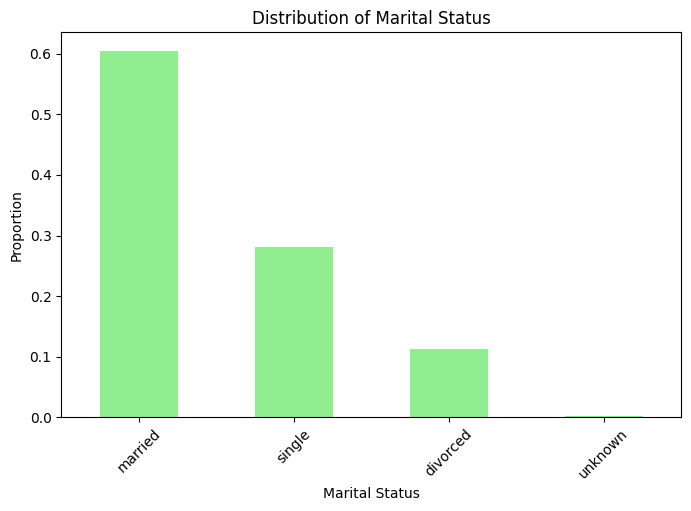

In [12]:
plt.figure(figsize=(8,5))
data['marital'].value_counts(normalize=True).plot(kind='bar', color='lightgreen')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

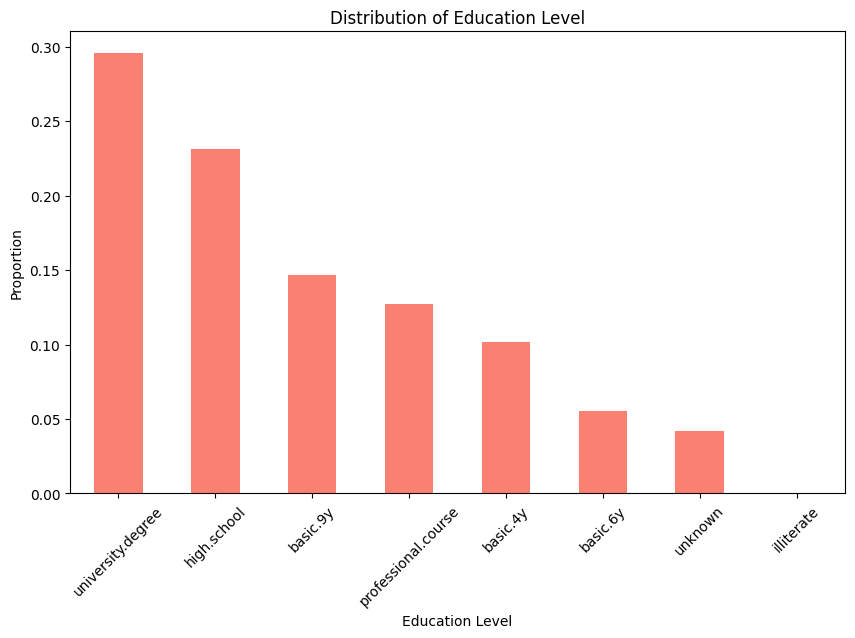

In [13]:
plt.figure(figsize=(10,6))
data['education'].value_counts(normalize=True).plot(kind='bar', color='salmon')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

**Висновки з завдання 6 (детальні)**

1. Розподіл професій (job):
Найбільш поширеними професіями серед клієнтів банку є адміністративні роботи (25%), роботи на підприємстві (23%) та технічні спеціалісти (17%).
Є деяка кількість записів зі значенням "unknown" (2%), які потребують подальшоого уточнення.

2. Розподіл сімейного стану (marital):
Більшість клієнтів банку є одруженими (60%), менше кількість одиноких (30%) та розведених (10%).
Відсутність значних кількостей "unknown" в цій категорії.

3. Розподіл рівня освіти (education):
Найбільш поширеним рівнем освіти серед клієнтів є університетська освіта (30%), за якою йде середня освіта (23%).
Є також невелика кількість записів з невідомим рівнем освіти (5%).

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

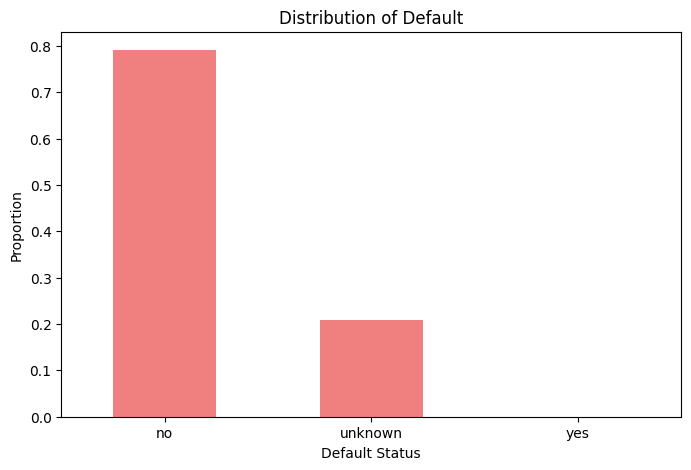

In [14]:
plt.figure(figsize=(8,5))
data['default'].value_counts(normalize=True).plot(kind='bar', color='lightcoral')
plt.title('Distribution of Default')
plt.xlabel('Default Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

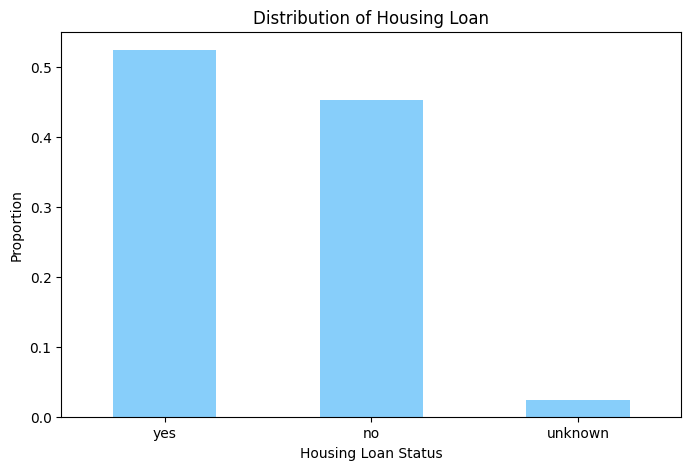

In [15]:
plt.figure(figsize=(8,5))
data['housing'].value_counts(normalize=True).plot(kind='bar', color='lightskyblue')
plt.title('Distribution of Housing Loan')
plt.xlabel('Housing Loan Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

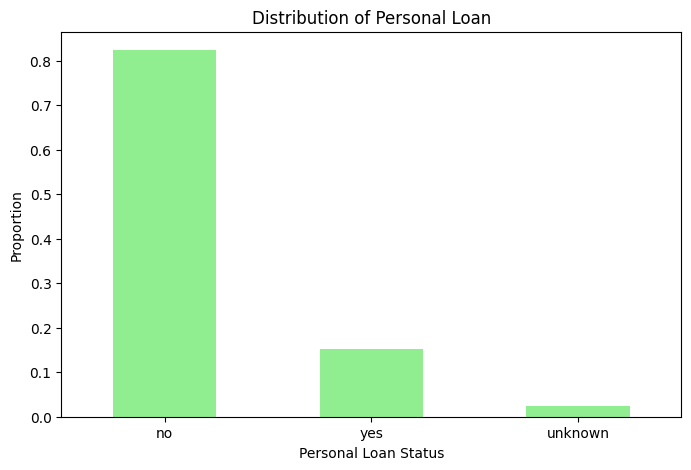

In [16]:
plt.figure(figsize=(8,5))
data['loan'].value_counts(normalize=True).plot(kind='bar', color='lightgreen')
plt.title('Distribution of Personal Loan')
plt.xlabel('Personal Loan Status')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [17]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col].astype(str))
      
    return df


In [18]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [19]:
def encode_age(dataframe: pd.DataFrame, age_col: str) -> pd.DataFrame:
    """
    Function for encoding age column
    
    dataframe: pd.DataFrame to encode
    age_col: age column to encode
    """
    quartiles = dataframe[age_col].quantile([0.25, 0.5, 0.75])
    
    def encode_age_value(age):
        if age <= quartiles[0.25]:
            return 0  
        elif age <= quartiles[0.5]:
            return 1  
        elif age <= quartiles[0.75]:
            return 2 
        else:
            return 3  
    
    dataframe[age_col] = dataframe[age_col].apply(encode_age_value)
    
    return dataframe

In [20]:
bank_client = encode_age(bank_client, 'age')

In [21]:

bank_client['age'].value_counts(normalize=True)


age
0    0.271341
2    0.246188
1    0.242765
3    0.239706
Name: proportion, dtype: float64

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

а результатами трансформації змінної Age ми спостерігаємо наступний розподіл категорій віку:

Категорія 0: До 25-го персентилю - приблизно 27% спостережень.

Категорія 1: До 50-го персентилю - приблизно 24% спостережень.

Категорія 2: До 75-го персентилю - приблизно 24% спостережень.

Категорія 3: Після 75-го персентилю - приблизно 24% спостережень.

Цей розподіл показує, що ми дійсно розділили вік на чотири категорії, як і було заплановано в завданні.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [22]:
bank_relat = data[['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']]

print(bank_relat)

print(bank_relat.isnull().sum())


         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
1      telephone   may         mon       149         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  
0      nonexistent  
1      nonexistent  
2      nonexistent  
3      nonexist

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [23]:
unique_contacts = bank_relat['contact'].unique()
print("Унікальні значення для атрибута 'contact':", unique_contacts)

unique_months = bank_relat['month'].unique()
print("Унікальні значення для атрибута 'month':", unique_months)

unique_days = bank_relat['day_of_week'].unique()
print("Унікальні значення для атрибута 'day_of_week':", unique_days)


Унікальні значення для атрибута 'contact': ['telephone' 'cellular']
Унікальні значення для атрибута 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Унікальні значення для атрибута 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



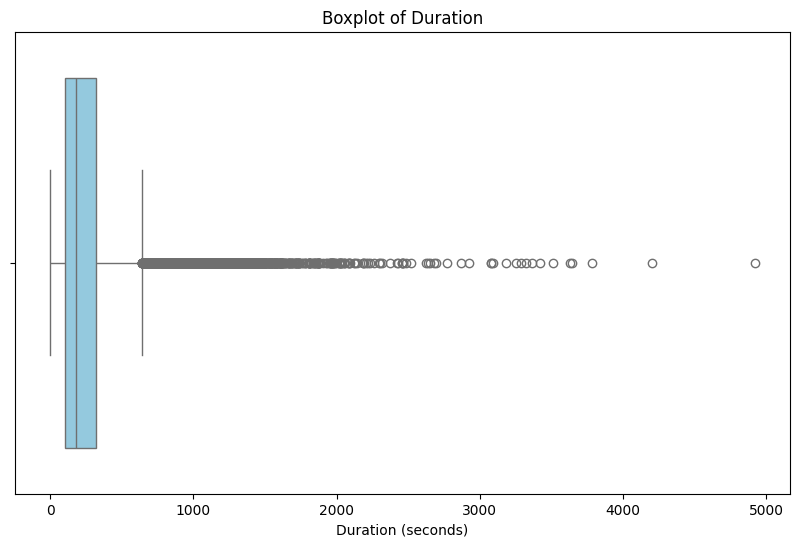

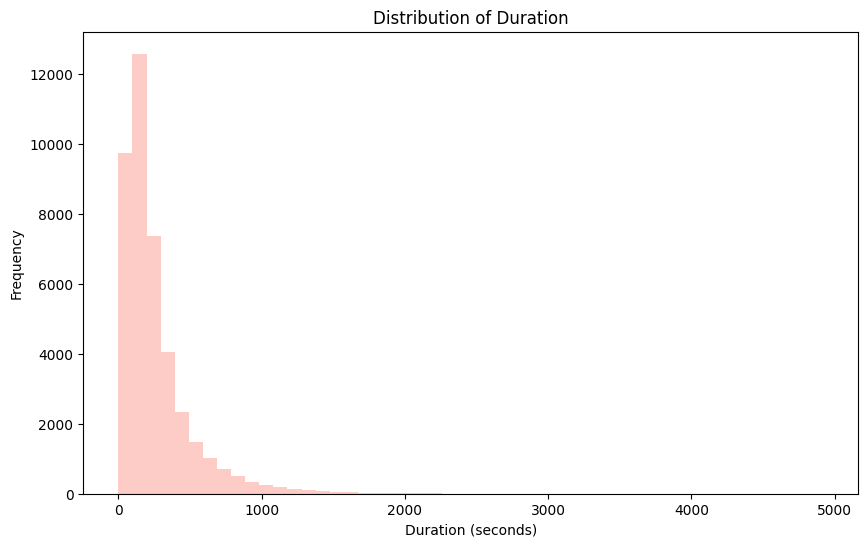

Skewness of Duration: 3.263141255262832


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', data=data, color='skyblue')
plt.title('Boxplot of Duration')
plt.xlabel('Duration (seconds)')
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(data['duration'], kde=False, color='salmon')
plt.title('Distribution of Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

print("Skewness of Duration:", data['duration'].skew())


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [25]:

categorical_cols = ['contact', 'month', 'day_of_week']

bank_relat_encoded = encode_categorical_columns(bank_relat, categorical_cols)

print(bank_relat_encoded.head())


   contact  month  day_of_week  duration  campaign  pdays  previous  \
0        1      6            1       261         1    999         0   
1        1      6            1       149         1    999         0   
2        1      6            1       226         1    999         0   
3        1      6            1       151         1    999         0   
4        1      6            1       307         1    999         0   

      poutcome  
0  nonexistent  
1  nonexistent  
2  nonexistent  
3  nonexistent  
4  nonexistent  


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [26]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    """
    Function for encoding duration column
    
    dataframe: pd.DataFrame to encode
    duration_col: duration column to encode
    """
 
    quartiles = dataframe[duration_col].quantile([0.25, 0.5, 0.75])
  
    def encode_duration_value(duration):
        if duration <= quartiles[0.25]:
            return 0  
        elif duration <= quartiles[0.5]:
            return 1 
        elif duration <= quartiles[0.75]:
            return 2
        else:
            return 3 
    
    dataframe[duration_col] = dataframe[duration_col].apply(encode_duration_value)
    
    return dataframe

bank_relat_encoded = encode_duration(bank_relat_encoded, 'duration')


In [27]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [28]:

bank_socec = data.iloc[:, 16:21]

print(bank_socec.head())


   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y
0          93.994          -36.4      4.857       5191.0  no
1          93.994          -36.4      4.857       5191.0  no
2          93.994          -36.4      4.857       5191.0  no
3          93.994          -36.4      4.857       5191.0  no
4          93.994          -36.4      4.857       5191.0  no


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [29]:
bank_other = data[['campaign', 'pdays', 'previous', 'poutcome']]

print(bank_other.head())


   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [30]:
le = LabelEncoder()

bank_other['poutcome'] = le.fit_transform(bank_other['poutcome'])

print(bank_other.head())


   campaign  pdays  previous  poutcome
0         1    999         0         1
1         1    999         0         1
2         1    999         0         1
3         1    999         0         1
4         1    999         0         1


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [31]:

bank_final = pd.concat([bank_client, bank_relat_encoded, bank_socec, bank_other], axis=1)

print(bank_final.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')


**Завдання 19** Провести ділення вибірки

In [ ]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(data.drop(columns=['y']), data['y'], 0.2, 10, 101)
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

X_train, X_test = scale_the_data(X_train, X_test)


## Логістична Регресія

In [ ]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred), 2) * 100)


LOGCV = cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()


[[7208   71]
 [ 776  183]]
90.0


## k-NN

In [ ]:
X_train = bank_final 
neighbors = np.arange(0, 25)

cv_scores = []

for k in neighbors:
    k_value = k + 1
    knn = KNeighborsClassifier(n_neighbors=k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean() * 100, scores.std() * 100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

knnpred = knn.predict(X_test)

print("Матриця невідповідностей:")
print(confusion_matrix(y_test, knnpred))
print("Точність:")
print(round(accuracy_score(y_test, knnpred), 2) * 100)

KNNCV = cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print("Середня точність за допомогою крос-валідації:", KNNCV)

## Логістична Регресія

In [ ]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)
log_accuracy = accuracy_score(y_test, logpred)

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knnpred)

models = pd.DataFrame({
    'Models': ['Logistic Regression', 'k-NN'],
    'Score': [log_accuracy, knn_accuracy]
})

models_sorted = models.sort_values(by='Score', ascending=False)

print(models_sorted)


**Висновки по моделям (детальні)**

1.   Логістична регресія та метод k-найближчих сусідів (k-NN) були використані для прогнозування того, чи клієнт підписав терміновий депозит.
2.   проводиться оптимізація параметрів для k-NN, зокрема, визначення оптимального значення параметра k.
Графік показує залежність точності моделі від кількості сусідів (k). На основі цього графіка обирається найкраще значення k.
3. Порівнюються результати двох моделей за допомогою матриць невідповідностей та точності.
Результати крос-валідації також використовуються для оцінки середньої точності моделей